## Project 4: Topic Modeling

### Import All Libraries & Packages

In [1]:
import numpy  as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn           as sns

import html.parser
import string
import nltk

import gensim
import gensim.corpora as corpora

import pyLDAvis
import pyLDAvis.sklearn

import spacy

from   nltk.tokenize      import WordPunctTokenizer,word_tokenize
from   nltk.stem.wordnet  import WordNetLemmatizer
from   nltk.corpus        import stopwords

from   gensim.utils       import simple_preprocess
from   gensim.models      import CoherenceModel

from   sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from   sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from   sklearn.model_selection         import train_test_split
from   sklearn.decomposition           import TruncatedSVD
from   sklearn.decomposition           import NMF
from   sklearn.cluster                 import KMeans
from   sklearn.metrics.pairwise        import cosine_similarity
from   sklearn.model_selection         import GridSearchCV
from   sklearn.decomposition           import LatentDirichletAllocation as LDA

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

### Set Global Parameters

In [2]:
# Set global parameters
SEED                    = 42     # Random seed
sample_test_size        = 0.00   # 1% of sample size for testing
cv_value                = 5      # Cross validation number of folds

### Load Data Files

In [3]:
file_path = './data/'
file_name = 'pulled_all_delta_airline_tweets_clean.csv'

csv_file  = file_path+file_name

df = pd.read_csv(csv_file,encoding ='utf-8-sig')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23427 entries, 0 to 23426
Data columns (total 5 columns):
Unnamed: 0     23427 non-null int64
airline        23427 non-null object
date           23427 non-null object
raw tweet      23427 non-null object
clean_tweet    22861 non-null object
dtypes: int64(1), object(4)
memory usage: 915.2+ KB


In [5]:
df_ct1 = df.dropna()


In [6]:
print(df_ct1.shape)


(22861, 5)


### Vectorization

In [7]:
# Set X matrix
X = df_ct1.clean_tweet

print(X.shape)

(22861,)


#### Train-Test Split

In [8]:
# Train, test split
# In this case I do not have a target as of yet hence unsupervised Learning
#X_train, X_test = train_test_split(X, test_size=sample_test_size, random_state=SEED)
X_train = X

#### Term Frequency - Inverse Document Frequency (TF-IDF)

In [9]:
min_df_input = 10
max_df_input = 0.90

# Token patterm. Here remove words with three or less characters.
tk_pattern = '[a-zA-Z0-9]{4,}'

tfidf1         = TfidfVectorizer(stop_words='english',
                                 min_df=min_df_input,
                                 max_df=max_df_input,
                                 token_pattern=tk_pattern)

X_train_tfidf1 = tfidf1.fit_transform(X_train)
#X_test_tfidf1  = tfidf1.transform(X_test)

# Bi-grams
tfidf2         = TfidfVectorizer(ngram_range=(1,2), 
                                 stop_words='english',
                                 min_df=min_df_input,
                                 max_df=max_df_input,
                                 token_pattern=tk_pattern)

X_train_tfidf2 = tfidf2.fit_transform(X_train)
#X_test_tfidf2  = tfidf2.transform(X_test)

# Tri-grams
tfidf3         = TfidfVectorizer(ngram_range=(1,3), 
                                 stop_words='english',
                                 min_df=min_df_input,
                                 max_df=max_df_input,
                                 token_pattern=tk_pattern)

X_train_tfidf3 = tfidf3.fit_transform(X_train)
#X_test_tfidf3  = tfidf3.transform(X_test)

In [10]:
df_tfidf1 = pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names()).head()

In [11]:
pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names()).shape

(22861, 2406)

In [12]:
pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names()).head()

abby  ability  able  aboard  absolute  absolutely  absurd  abuse  accept  \
0   0.0      0.0   0.0     0.0       0.0         0.0     0.0    0.0     0.0   
1   0.0      0.0   0.0     0.0       0.0         0.0     0.0    0.0     0.0   
2   0.0      0.0   0.0     0.0       0.0         0.0     0.0    0.0     0.0   
3   0.0      0.0   0.0     0.0       0.0         0.0     0.0    0.0     0.0   
4   0.0      0.0   0.0     0.0       0.0         0.0     0.0    0.0     0.0   

   acceptable  ...  wrote  yall  year  yellow  yesterday  yikes  york  young  \
0         0.0  ...    0.0   0.0   0.0     0.0        0.0    0.0   0.0    0.0   
1         0.0  ...    0.0   0.0   0.0     0.0        0.0    0.0   0.0    0.0   
2         0.0  ...    0.0   0.0   0.0     0.0        0.0    0.0   0.0    0.0   
3         0.0  ...    0.0   0.0   0.0     0.0        0.0    0.0   0.0    0.0   
4         0.0  ...    0.0   0.0   0.0     0.0        0.0    0.0   0.0    0.0   

   zero  zone  
0   0.0   0.0  
1   0.0   0.0  
2   0.0   0.0  
3   0.0   0.0  
4   0.0   0.0  

[5 rows x 2406 columns]

In [13]:
pd.DataFrame(X_train_tfidf2.toarray(), columns=tfidf2.get_feature_names()).head()

abby  ability  able  able help  able watch  aboard  absolute  absolutely  \
0   0.0      0.0   0.0        0.0         0.0     0.0       0.0         0.0   
1   0.0      0.0   0.0        0.0         0.0     0.0       0.0         0.0   
2   0.0      0.0   0.0        0.0         0.0     0.0       0.0         0.0   
3   0.0      0.0   0.0        0.0         0.0     0.0       0.0         0.0   
4   0.0      0.0   0.0        0.0         0.0     0.0       0.0         0.0   

   absurd  abuse  ...  year  year year  yellow  yesterday  yikes  york  young  \
0     0.0    0.0  ...   0.0        0.0     0.0        0.0    0.0   0.0    0.0   
1     0.0    0.0  ...   0.0        0.0     0.0        0.0    0.0   0.0    0.0   
2     0.0    0.0  ...   0.0        0.0     0.0        0.0    0.0   0.0    0.0   
3     0.0    0.0  ...   0.0        0.0     0.0        0.0    0.0   0.0    0.0   
4     0.0    0.0  ...   0.0        0.0     0.0        0.0    0.0   0.0    0.0   

   young child  zero  zone  
0          0.0   0.0   0.0  
1          0.0   0.0   0.0  
2          0.0   0.0   0.0  
3          0.0   0.0   0.0  
4          0.0   0.0   0.0  

[5 rows x 2790 columns]

In [14]:
pd.DataFrame(X_train_tfidf3.toarray(), columns=tfidf3.get_feature_names()).head()

abby  ability  able  able help  able watch  aboard  absolute  absolutely  \
0   0.0      0.0   0.0        0.0         0.0     0.0       0.0         0.0   
1   0.0      0.0   0.0        0.0         0.0     0.0       0.0         0.0   
2   0.0      0.0   0.0        0.0         0.0     0.0       0.0         0.0   
3   0.0      0.0   0.0        0.0         0.0     0.0       0.0         0.0   
4   0.0      0.0   0.0        0.0         0.0     0.0       0.0         0.0   

   absurd  abuse  ...  year  year year  yellow  yesterday  yikes  york  young  \
0     0.0    0.0  ...   0.0        0.0     0.0        0.0    0.0   0.0    0.0   
1     0.0    0.0  ...   0.0        0.0     0.0        0.0    0.0   0.0    0.0   
2     0.0    0.0  ...   0.0        0.0     0.0        0.0    0.0   0.0    0.0   
3     0.0    0.0  ...   0.0        0.0     0.0        0.0    0.0   0.0    0.0   
4     0.0    0.0  ...   0.0        0.0     0.0        0.0    0.0   0.0    0.0   

   young child  zero  zone  
0          0.0   0.0   0.0  
1          0.0   0.0   0.0  
2          0.0   0.0   0.0  
3          0.0   0.0   0.0  
4          0.0   0.0   0.0  

[5 rows x 2816 columns]

In [15]:
pd.DataFrame(X_train_tfidf3.toarray(), columns=tfidf3.get_feature_names()).shape

(22861, 2816)

### Dimensionality Reduction

#### Latent Semantic Analysis (LSA)

In [16]:
num_topics_lsa = 10

lsa1 = TruncatedSVD(num_topics_lsa,n_iter=100,random_state=SEED)

X_train_tfidf1_lsa1_topic = lsa1.fit_transform(X_train_tfidf1)

lsa1.explained_variance_ratio_

array([0.00729456, 0.00545764, 0.00623428, 0.0057524 , 0.00545469,
       0.00531593, 0.00509339, 0.00493323, 0.00478982, 0.00452679])

In [17]:
# Bi-grams
lsa2 = TruncatedSVD(num_topics_lsa,n_iter=100,random_state=SEED)

X_train_tfidf2_lsa2_topic = lsa2.fit_transform(X_train_tfidf2)

In [18]:
# Tri-grams
lsa3 = TruncatedSVD(num_topics_lsa,n_iter=100,random_state=SEED)

X_train_tfidf3_lsa3_topic = lsa3.fit_transform(X_train_tfidf3)

In [19]:
# This is from the lecture notebook (Topic modeling with LSA and NMF)
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix+1)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [20]:
display_topics(lsa1, tfidf1.get_feature_names(), 10)


Topic  1
thank, service, help, customer, like, great, seat, good, hour, love

Topic  2
thank, goodness, sponsor, reply, clarification, fixing, museum, continued, sharing, voted

Topic  3
love, movie, scene, good, watch, thank, booksmart, rocketman, airplane, lesbian

Topic  4
help, love, connection, check, reservation, gate, trying, left, number, phone

Topic  5
good, help, luck, thing, morning, night, looking, care, idea, reservation

Topic  6
service, customer, great, love, experience, best, airport, gate, care, worst

Topic  7
seat, gate, good, hour, upgrade, love, middle, class, comfort, window

Topic  8
like, service, customer, help, love, good, sound, feel, experience, worst

Topic  9
work, love, attendant, travel, wifi, awesome, sleep, hour, twitter, trip

Topic  10
seat, service, customer, great, help, work, upgrade, like, middle, movie


In [21]:
display_topics(lsa2, tfidf2.get_feature_names(), 10)


Topic  1
thank, service, help, customer, like, great, seat, customer service, love, good

Topic  2
thank, thank making, thank goodness, thank helping, sponsor, goodness, thank amazing, thank help, thank great, clarification

Topic  3
love, scene, movie, love scene, good, watch, love love, thank, rocketman, booksmart

Topic  4
help, love, connection, reservation, check, trying, left, lost, number, phone

Topic  5
service, customer, customer service, love, great, great customer, care, experience, amazing, best

Topic  6
good, help, good luck, luck, thing, good thing, airplane, good morning, morning, work

Topic  7
work, seat, movie, hour, great, watch, airplane, sleep, airport, right

Topic  8
seat, gate, hour, upgrade, middle, check, minute, airport, agent, class

Topic  9
movie, airplane, watch, great, scene, right, watch movie, best, airport, child

Topic  10
seat, movie, customer, service, customer service, watch, help, airplane, work, upgrade


In [22]:
display_topics(lsa3, tfidf3.get_feature_names(), 10)


Topic  1
thank, service, help, customer, like, great, seat, love, good, customer service

Topic  2
thank, thank making, thank goodness, thank helping, sponsor, goodness, thank amazing, thank great, thank help, clarification

Topic  3
love, scene, movie, love scene, watch, love love, thank, good, rocketman, airplane

Topic  4
help, love, connection, reservation, check, trying, left, lost, phone, number

Topic  5
service, customer, customer service, great, love, experience, care, great customer, great customer service, best

Topic  6
good, help, good luck, luck, thing, good thing, airplane, good morning, work, morning

Topic  7
work, movie, seat, hour, watch, great, airplane, sleep, airport, right

Topic  8
seat, gate, hour, upgrade, middle, check, minute, airport, agent, class

Topic  9
movie, airplane, watch, great, scene, right, watch movie, best, airport, child

Topic  10
seat, movie, customer, service, customer service, watch, help, airplane, work, upgrade


#### Latent Dirichlet Allocation (LDA)

##### LDA with GridSearchCV

In [ ]:
# From Torin
# Define Search Params
# Search broadly, then narrow

# The first run actually used the below parameters. Best Model gave n_comp = 5 & learning decay of 0.7
#search_params = {'n_components': [5, 10, 15, 20, 25, 30, 35, 40], 'learning_decay': [.5,.7, .9]}

#search_params = {'n_components': [5, 6, 7, 8, 9, 10], 'learning_decay': [.7]} 

# Init the Model
#lda = LDA(n_jobs = -1,random_state=SEED)

# Init Grid Search Class
#model = GridSearchCV(lda, param_grid=search_params, cv=cv_value)

# Do the Grid Search
#model.fit(X_train_tfidf1)   # Did not run

In [ ]:
'''
# Best Model
skl_best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

opt_n_topics = model.best_params_['n_components']

# Log Likelihood Score
print("Best Log Likelihood: ", model.best_score_)

# Perplextiy 
print("Model Perplexity: ", skl_best_lda_model.perplexity(X_train_tfidf1))
''';

In [ ]:
# From Torin
# Get Log Likelyhoods from Grid Search Output
#n_topics = [5, 10, 15, 20, 25, 30, 35, 40]
n_topics = [5, 6, 7, 8, 9, 10]

#log_likelyhoods_5 = np.round(model.cv_results_['mean_test_score'][0:7])
#log_likelyhoods_7 = np.round(model.cv_results_['mean_test_score'][0:6])
#log_likelyhoods_9 = np.round(model.cv_results_['mean_test_score'][14:])

# Show graph
#plt.figure(figsize=(12, 8))
#plt.plot(n_topics, log_likelyhoods_5, label='0.5')
#plt.plot(n_topics, log_likelyhoods_7, label='0.7')
#plt.plot(n_topics, log_likelyhoods_9, label='0.9')
#plt.title("Choosing Optimal LDA Model")
#plt.xlabel("Num Topics")
#plt.ylabel("Log Likelihood Scores")
#plt.legend(title='Learning decay', loc='best')
#plt.show()
#plt.savefig('loglikelyhood_scores_gcv_5_10_LDA.svg')

In [ ]:
# Get Log Likelyhoods from Grid Search Output
#n_topics = [10, 15, 20, 25, 30]
#log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ if gscore.para['learning_decay']==0.5]
#log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ if gscore.parameters['learning_decay']==0.7]
#log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.cv_results_ if gscore.parameters['learning_decay']==0.9]

# Show graph
#plt.figure(figsize=(12, 8))
#plt.plot(n_topics, log_likelyhoods_5, label='0.5')
#plt.plot(n_topics, log_likelyhoods_7, label='0.7')
#plt.plot(n_topics, log_likelyhoods_9, label='0.9')
#plt.title("Choosing Optimal LDA Model")
#plt.xlabel("Num Topics")
#plt.ylabel("Log Likelyhood Scores")
#plt.legend(title='Learning decay', loc='best')
#plt.show()

In [ ]:
"""
# Create Document - Topic Matrix
lda_output = skl_best_lda_model.transform(X_train_tfidf1)

# column names
topicnames = ["Topic " + str(i) for i in range(skl_best_lda_model.n_components)]

# index names
docnames = ["Doc " + str(i) for i in range(len(X_train))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics
""";

#### pyLDAviz, NumTopics = 4

In [25]:
# Show top n keywords for each topic
def show_topics(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

In [53]:
# Let's rerun this with 4 topics still for unigrams
lda_top4 = LDA(n_components=4, n_jobs=-1, random_state=SEED)
X_train_tfidf1_lda_topic4 = lda_top4.fit_transform(X_train_tfidf1)

In [54]:
topic_keywords4 = show_topics(vectorizer=tfidf1, lda_model=lda_top4, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords4 = pd.DataFrame(topic_keywords4)
df_topic_keywords4.columns = ['Word '+str(i+1) for i in range(df_topic_keywords4.shape[1])]
df_topic_keywords4.index = ['Topic '+str(i+1) for i in range(df_topic_keywords4.shape[0])]
df_topic_keywords4

Word 1 Word 2    Word 3   Word 4  Word 5    Word 6   Word 7   Word 8  \
Topic 1   hour   gate      seat  airport  minute     delay     club  sitting   
Topic 2  right  movie     watch     year   thing     child     porn     care   
Topic 3   help   work  airplane     good    mile      best   ticket    sleep   
Topic 4  thank   love     great  service    like  customer  awesome    today   

           Word 9     Word 10  
Topic 1  boarding    terminal  
Topic 2      like     service  
Topic 3      trip  definitely  
Topic 4    boston        suck

In [55]:
# Uni-grams
pyLDAvis.enable_notebook()

vis_lda_uni_top4 = pyLDAvis.sklearn.prepare(lda_top4, X_train_tfidf1, tfidf1, sort_topics=False)

vis_lda_uni_top4

/Users/phoitack/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.071269  0.167902       1        1  28.105260
1     -0.051343 -0.201492       2        1  24.435556
2     -0.116643  0.018026       3        1  23.973544
3      0.239255  0.015564       4        1  23.485640, topic_info=     Category        Freq         Term       Total  loglift  logprob
2162  Default  343.000000        thank  343.000000  30.0000  30.0000
1294  Default  242.000000         love  242.000000  29.0000  29.0000
961   Default  216.000000        great  216.000000  28.0000  28.0000
51    Default  129.000000     airplane  129.000000  27.0000  27.0000
1843  Default  200.000000        right  200.000000  26.0000  26.0000
1073  Default  241.000000         hour  241.000000  25.0000  25.0000
924   Default  205.000000         gate  205.000000  24.0000  24.0000
2331  Default  121.000000        watch  121.000000  23.0000  23.0000
167   Default  102.000000      awesome  102.000000  22.0000  22.0000
1383  Default  126.000000       minute  126.000000  21.0000  21.0000
1985  Default   93.000000        sleep   93.000000  20.0000  20.0000
1370  Default  125.000000         mile  125.000000  19.0000  19.0000
247   Default   87.000000       boston   87.000000  18.0000  18.0000
2101  Default   85.000000         suck   85.000000  17.0000  17.0000
207   Default  157.000000         best  157.000000  16.0000  16.0000
426   Default  100.000000         club  100.000000  15.0000  15.0000
1028  Default  277.000000         help  277.000000  14.0000  14.0000
69    Default   81.000000      amazing   81.000000  13.0000  13.0000
53    Default  192.000000      airport  192.000000  12.0000  12.0000
585   Default   77.000000   definitely   77.000000  11.0000  11.0000
1606  Default   78.000000         porn   78.000000  10.0000  10.0000
389   Default   84.000000        child   84.000000   9.0000   9.0000
2314  Default   83.000000      waiting   83.000000   8.0000   8.0000
1410  Default  225.000000        movie  225.000000   7.0000   7.0000
2377  Default  215.000000         work  215.000000   6.0000   6.0000
1977  Default   93.000000      sitting   93.000000   5.0000   5.0000
1440  Default   69.000000      nonstop   69.000000   4.0000   4.0000
321   Default   76.000000         card   76.000000   3.0000   3.0000
2179  Default  136.000000       ticket  136.000000   2.0000   2.0000
589   Default  122.000000        delay  122.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
1380   Topic4   19.618320  minneapolis   20.354498   1.4119  -6.3602
238    Topic4   18.881926       boeing   19.608779   1.4110  -6.3985
354    Topic4   18.912172       center   19.647405   1.4106  -6.3969
1706   Topic4   28.708994        quick   29.985971   1.4053  -5.9794
961    Topic4  193.766907        great  216.221431   1.3391  -4.0700
1031   Topic4   32.651271      helping   34.561956   1.3919  -5.8508
509    Topic4   54.105057         cool   59.936094   1.3464  -5.3457
1965   Topic4   25.843051         sign   27.292516   1.3942  -6.0846
2346   Topic4   41.990505      welcome   47.789159   1.3194  -5.5992
1016   Topic4   49.774295         hear   59.497567   1.2703  -5.4292
2148   Topic4   50.530031         team   62.739755   1.2324  -5.4141
1471   Topic4   35.710006         okay   41.231548   1.3050  -5.7612
2376   Topic4   36.915692         word   43.209134   1.2914  -5.7280
2381   Topic4   55.205207        world   72.982629   1.1696  -5.3256
1432   Topic4   69.398477         nice  100.069760   1.0828  -5.0968
728    Topic4   45.544913     employee   59.823172   1.1761  -5.5180
552    Topic4  112.216732     customer  221.445655   0.7690  -4.6162
2016   Topic4   63.539371        sorry   97.575827   1.0198  -5.1850
2186   Topic4   98.681003        today  185.070426   0.8199  -4.7448
1928   Topic4  126.534623      service  267.412592   0.7005  -4.4961
147    Topic4   76.751561    attendant  133.0

In [56]:
'''
# Create Document - Topic Matrix
lda_output = lda_top4.transform(X_train_tfidf1)

# column names
topicnames = ["Topic " + str(i) for i in range(lda_top4.n_components)]

# index names
docnames = ["Doc " + str(i) for i in range(len(X_train))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics
''';

In [ ]:
# Number of distributed topics
#df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
#df_topic_distribution.columns = ['Topic Num', 'Num Documents']
#df_topic_distribution

In [ ]:
# Topic - Keywords Dataframe
#df_topic_keywords = pd.DataFrame(topic_keywords)
#df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
#df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
#df_topic_keywords

#### pyLDAviz, NumTopics = 5

In [65]:
# Let's rerun this with 4 topics still for unigrams
lda_top5 = LDA(n_components=5, n_jobs=-1, random_state=SEED)
X_train_tfidf1_lda_topic5 = lda_top5.fit_transform(X_train_tfidf1)

In [66]:
topic_keywords5 = show_topics(vectorizer=tfidf1, lda_model=lda_top5, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords5 = pd.DataFrame(topic_keywords5)
df_topic_keywords5.columns = ['Word '+str(i+1) for i in range(df_topic_keywords5.shape[1])]
df_topic_keywords5.index = ['Topic '+str(i+1) for i in range(df_topic_keywords5.shape[0])]
df_topic_keywords5

Word 1 Word 2    Word 3   Word 4    Word 5   Word 6   Word 7  \
Topic 1   hour   gate   airport   minute     check    delay  waiting   
Topic 2   seat  right     watch    movie      porn    class   status   
Topic 3   help  movie  airplane    scene     sleep   ticket     mile   
Topic 4  thank   love     great  service  customer  awesome   boston   
Topic 5   good   like      work     nice      safe     hope     home   

             Word 8 Word 9   Word 10  
Topic 1     sitting   club  terminal  
Topic 2     upgrade  child      care  
Topic 3  definitely   best      trip  
Topic 4        suck  today   amazing  
Topic 5      travel   fuck      soon

In [67]:
# Uni-grams
pyLDAvis.enable_notebook()

vis_lda_uni_top5 = pyLDAvis.sklearn.prepare(lda_top5, X_train_tfidf1, tfidf1, sort_topics=False)

vis_lda_uni_top5

/Users/phoitack/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.030557 -0.010318       1        1  23.131285
1     -0.116936 -0.012478       2        1  21.233811
2     -0.175812 -0.013549       3        1  19.700835
3      0.154369 -0.159938       4        1  18.837568
4      0.107821  0.196283       5        1  17.096501, topic_info=     Category        Freq        Term       Total  loglift  logprob
2162  Default  342.000000       thank  342.000000  30.0000  30.0000
1294  Default  241.000000        love  241.000000  29.0000  29.0000
167   Default  102.000000     awesome  102.000000  28.0000  28.0000
947   Default  254.000000        good  254.000000  27.0000  27.0000
924   Default  205.000000        gate  205.000000  26.0000  26.0000
1073  Default  241.000000        hour  241.000000  25.0000  25.0000
51    Default  127.000000    airplane  127.000000  24.0000  24.0000
1985  Default   93.000000       sleep   93.000000  23.0000  23.0000
961   Default  217.000000       great  217.000000  22.0000  22.0000
247   Default   87.000000      boston   87.000000  21.0000  21.0000
1899  Default  265.000000        seat  265.000000  20.0000  20.0000
2101  Default   85.000000        suck   85.000000  19.0000  19.0000
1383  Default  126.000000      minute  126.000000  18.0000  18.0000
1885  Default  121.000000       scene  121.000000  17.0000  17.0000
69    Default   81.000000     amazing   81.000000  16.0000  16.0000
585   Default   76.000000  definitely   76.000000  15.0000  15.0000
2314  Default   83.000000     waiting   83.000000  14.0000  14.0000
1867  Default   67.000000        safe   67.000000  13.0000  13.0000
1606  Default   76.000000        porn   76.000000  12.0000  12.0000
1410  Default  223.000000       movie  223.000000  11.0000  11.0000
1440  Default   69.000000     nonstop   69.000000  10.0000  10.0000
2331  Default  119.000000       watch  119.000000   9.0000   9.0000
1977  Default   93.000000     sitting   93.000000   8.0000   8.0000
589   Default  122.000000       delay  122.000000   7.0000   7.0000
2179  Default  135.000000      ticket  135.000000   6.0000   6.0000
53    Default  193.000000     airport  193.000000   5.0000   5.0000
426   Default  101.000000        club  101.000000   4.0000   4.0000
552   Default  219.000000    customer  219.000000   3.0000   3.0000
912   Default   52.000000        fuck   52.000000   2.0000   2.0000
1028  Default  276.000000        help  276.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
1435   Topic5   19.848945   nightmare   21.546992   1.6842  -6.0310
937    Topic5   37.505578        girl   43.133441   1.6265  -5.3947
2013   Topic5   49.948581        soon   59.316757   1.5944  -5.1081
1651   Topic5   41.390658     private   48.688311   1.6039  -5.2961
1903   Topic5   36.913141     seattle   43.114703   1.6110  -5.4106
891    Topic5   32.488071     forward   37.506650   1.6227  -5.5383
947    Topic5  157.728196        good  254.201483   1.2890  -3.9583
1653   Topic5   43.556907    probably   58.378154   1.4734  -5.2451
1432   Topic5   67.683910        nice  102.411232   1.3521  -4.8043
1692   Topic5   28.513676     pumping   35.332247   1.5519  -5.6688
535    Topic5   23.302013       crazy   27.361617   1.6057  -5.8706
2377   Topic5  107.237960        work  216.201902   1.0651  -4.3441
405    Topic5   31.735366        city   42.185063   1.4817  -5.5617
2020   Topic5   29.741482       sound   40.363322   1.4609  -5.6266
1283   Topic5   45.624784     looking   78.827090   1.2195  -5.1987
1064   Topic5   60.212345        hope  123.165112   1.0506  -4.9213
1251   Topic5  110.018085        like  330.000249   0.6678  -4.3185
1053   Topic5   55.963996        home  151.428858   0.7709  -4.9944
2217   Topic5   53.357149      travel  164.058496   0.6431  -5.0421
1341   Topic5   37.816034       maybe   83.176762   0.9781  -5.3864
1404   Topic5   38.022459     morning   95.

#### pyLDAviz, NumTopics = 6

In [68]:
# Let's rerun this with 4 topics still for unigrams
lda_top6 = LDA(n_components=6, n_jobs=-1, random_state=SEED)
X_train_tfidf1_lda_topic6 = lda_top6.fit_transform(X_train_tfidf1)

In [69]:
topic_keywords6 = show_topics(vectorizer=tfidf1, lda_model=lda_top6, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords6 = pd.DataFrame(topic_keywords6)
df_topic_keywords6.columns = ['Word '+str(i+1) for i in range(df_topic_keywords6.shape[1])]
df_topic_keywords6.index = ['Topic '+str(i+1) for i in range(df_topic_keywords6.shape[0])]
df_topic_keywords6

Word 1    Word 2   Word 3    Word 4   Word 5      Word 6  Word 7  \
Topic 1   hour      seat     gate    minute  airport       delay   check   
Topic 2  movie     right    watch      porn    child       thing    like   
Topic 3   help  airplane    sleep     movie    scene  definitely  ticket   
Topic 4   love     great  service  customer  awesome      boston    like   
Topic 5   good      work     safe      nice     like        fuck    cool   
Topic 6  thank      club     year      glad     trip       class    like   

             Word 8    Word 9    Word 10  
Topic 1  connection   waiting    sitting  
Topic 2        baby  watching      wrong  
Topic 3        best      mile       book  
Topic 4        suck     today    nonstop  
Topic 5        home      okay     travel  
Topic 6        soon     enjoy  attendant

In [70]:
# Uni-grams
pyLDAvis.enable_notebook()

vis_lda_uni_top6 = pyLDAvis.sklearn.prepare(lda_top6, X_train_tfidf1, tfidf1, sort_topics=False)

vis_lda_uni_top6

/Users/phoitack/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.046440 -0.136658       1        1  22.567196
1      0.160222  0.079934       2        1  16.516916
2      0.164988 -0.093389       3        1  16.116246
3     -0.142444 -0.049189       4        1  15.673088
4     -0.051718  0.185776       5        1  13.488548
5     -0.084608  0.013524       6        1  15.638005, topic_info=     Category        Freq        Term       Total  loglift  logprob
2162  Default  345.000000       thank  345.000000  30.0000  30.0000
1410  Default  224.000000       movie  224.000000  29.0000  29.0000
947   Default  257.000000        good  257.000000  28.0000  28.0000
167   Default  103.000000     awesome  103.000000  27.0000  27.0000
426   Default  103.000000        club  103.000000  26.0000  26.0000
924   Default  201.000000        gate  201.000000  25.0000  25.0000
1985  Default   93.000000       sleep   93.000000  24.0000  24.0000
247   Default   88.000000      boston   88.000000  23.0000  23.0000
1294  Default  244.000000        love  244.000000  22.0000  22.0000
2331  Default  120.000000       watch  120.000000  21.0000  21.0000
961   Default  218.000000       great  218.000000  20.0000  20.0000
2101  Default   86.000000        suck   86.000000  19.0000  19.0000
1885  Default  121.000000       scene  121.000000  18.0000  18.0000
51    Default  128.000000    airplane  128.000000  17.0000  17.0000
1383  Default  122.000000      minute  122.000000  16.0000  16.0000
1606  Default   77.000000        porn   77.000000  15.0000  15.0000
1440  Default   70.000000     nonstop   70.000000  14.0000  14.0000
585   Default   77.000000  definitely   77.000000  13.0000  13.0000
1867  Default   68.000000        safe   68.000000  12.0000  12.0000
1073  Default  236.000000        hour  236.000000  11.0000  11.0000
1843  Default  200.000000       right  200.000000  10.0000  10.0000
389   Default   84.000000       child   84.000000   9.0000   9.0000
940   Default   67.000000        glad   67.000000   8.0000   8.0000
2314  Default   81.000000     waiting   81.000000   7.0000   7.0000
912   Default   53.000000        fuck   53.000000   6.0000   6.0000
1899  Default  259.000000        seat  259.000000   5.0000   5.0000
69    Default   82.000000     amazing   82.000000   4.0000   4.0000
2377  Default  217.000000        work  217.000000   3.0000   3.0000
589   Default  119.000000       delay  119.000000   2.0000   2.0000
1928  Default  267.000000     service  267.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
2162   Topic6  262.753807       thank  345.382183   1.5820  -3.3588
945    Topic6   28.724505        gold   33.589486   1.6990  -5.5722
1295   Topic6   19.688209       loved   22.458579   1.7238  -5.9500
853    Topic6   25.132804        fine   29.896353   1.6819  -5.7058
11     Topic6   27.218906      access   33.609516   1.6446  -5.6261
1293   Topic6   46.585403      lounge   65.026770   1.5220  -5.0887
1651   Topic6   35.866125     private   47.577132   1.5729  -5.3502
2036   Topic6   26.475262      spirit   33.609878   1.6169  -5.6538
1347   Topic6   33.454853   medallion   46.470253   1.5269  -5.4198
2398   Topic6   84.458808        year  169.808253   1.1571  -4.4937
826    Topic6   33.671546    favorite   48.103735   1.4988  -5.4133
994    Topic6   34.916587    happened   54.904680   1.4028  -5.3770
1248   Topic6   42.010142        life   75.070310   1.2750  -5.1921
2230   Topic6   58.770455        trip  134.978285   1.0240  -4.8563
409    Topic6   55.382598       class  132.387483   0.9840  -4.9157
2060   Topic6   41.000793      status   85.939629   1.1154  -5.2164
905    Topic6   33.459738      friend   57.428491   1.3153  -5.4196
1317   Topic6   36.822844      making   72.225173   1.1818  -5.3239
998    Topic6   36.433548       happy   72.321772   1.1698  -5.3345
147    Topic6   46.611039   attendant  133.092267   0.806

#### pyLDAviz, NumTopics = 7

In [71]:
# Let's rerun this with 4 topics still for unigrams
lda_top7 = LDA(n_components=7, n_jobs=-1, random_state=SEED)
X_train_tfidf1_lda_topic7 = lda_top7.fit_transform(X_train_tfidf1)

In [72]:
topic_keywords7 = show_topics(vectorizer=tfidf1, lda_model=lda_top7, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords7 = pd.DataFrame(topic_keywords7)
df_topic_keywords7.columns = ['Word '+str(i+1) for i in range(df_topic_keywords7.shape[1])]
df_topic_keywords7.index = ['Topic '+str(i+1) for i in range(df_topic_keywords7.shape[0])]
df_topic_keywords7

Word 1    Word 2   Word 3      Word 4    Word 5   Word 6    Word 7  \
Topic 1   hour      gate   minute     airport   sitting  waiting  terminal   
Topic 2  movie     watch    right       scene     child     porn      like   
Topic 3   help  airplane    sleep  definitely      best  service     check   
Topic 4   love     great  awesome     service  customer   boston      suck   
Topic 5   good      work    thing        like      fuck     cool   looking   
Topic 6  thank      seat  upgrade        club      year    class      trip   
Topic 7   safe      mile     game    customer   service   travel     delay   

           Word 8  Word 9  Word 10  
Topic 1  boarding  follow    leave  
Topic 2  watching    care     baby  
Topic 3    ticket  change     book  
Topic 4   nonstop    like  amazing  
Topic 5   private    okay    maybe  
Topic 6      glad  lounge  comfort  
Topic 7      home    help     shit

In [73]:
# Uni-grams
vis_lda_uni_top7 = pyLDAvis.sklearn.prepare(lda_top7, X_train_tfidf1, tfidf1, sort_topics=False)

vis_lda_uni_top7

/Users/phoitack/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.084590 -0.109715       1        1  16.814809
1     -0.220911  0.056651       2        1  14.590733
2     -0.106564 -0.127037       3        1  12.900780
3      0.117725  0.125265       4        1  13.281559
4      0.003123  0.151234       5        1  12.514659
5      0.046148 -0.011918       6        1  14.789268
6      0.075889 -0.084481       7        1  15.108192, topic_info=     Category        Freq        Term       Total  loglift  logprob
2162  Default  340.000000       thank  340.000000  30.0000  30.0000
1410  Default  222.000000       movie  222.000000  29.0000  29.0000
1294  Default  243.000000        love  243.000000  28.0000  28.0000
2331  Default  119.000000       watch  119.000000  27.0000  27.0000
167   Default  103.000000     awesome  103.000000  26.0000  26.0000
51    Default  130.000000    airplane  130.000000  25.0000  25.0000
1985  Default   95.000000       sleep   95.000000  24.0000  24.0000
1885  Default  120.000000       scene  120.000000  23.0000  23.0000
247   Default   88.000000      boston   88.000000  22.0000  22.0000
961   Default  216.000000       great  216.000000  21.0000  21.0000
2101  Default   86.000000        suck   86.000000  20.0000  20.0000
924   Default  205.000000        gate  205.000000  19.0000  19.0000
1606  Default   77.000000        porn   77.000000  18.0000  18.0000
947   Default  251.000000        good  251.000000  17.0000  17.0000
1440  Default   70.000000     nonstop   70.000000  16.0000  16.0000
426   Default  101.000000        club  101.000000  15.0000  15.0000
389   Default   83.000000       child   83.000000  14.0000  14.0000
1073  Default  240.000000        hour  240.000000  13.0000  13.0000
1383  Default  125.000000      minute  125.000000  12.0000  12.0000
585   Default   78.000000  definitely   78.000000  11.0000  11.0000
1899  Default  266.000000        seat  266.000000  10.0000  10.0000
1867  Default   64.000000        safe   64.000000   9.0000   9.0000
2275  Default  123.000000     upgrade  123.000000   8.0000   8.0000
1028  Default  278.000000        help  278.000000   7.0000   7.0000
1843  Default  199.000000       right  199.000000   6.0000   6.0000
874   Default   62.000000      follow   62.000000   5.0000   5.0000
1928  Default  268.000000     service  268.000000   4.0000   4.0000
912   Default   51.000000        fuck   51.000000   3.0000   3.0000
69    Default   81.000000     amazing   81.000000   2.0000   2.0000
1977  Default   93.000000     sitting   93.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
192    Topic7   27.276168   beautiful   35.327328   1.6313  -5.5895
369    Topic7   24.550935      charge   32.215791   1.6182  -5.6948
868    Topic7   33.449837       flown   48.467753   1.5191  -5.3855
2049   Topic7   17.954028     standby   22.555781   1.6618  -6.0077
1265   Topic7   31.794310        live   48.554754   1.4665  -5.4362
2273   Topic7   33.253972      update   52.328099   1.4366  -5.3913
1370   Topic7   60.555733        mile  124.524729   1.1690  -4.7919
514    Topic7   27.472186        cost   40.238917   1.5083  -5.5823
486    Topic7   48.751478  connection   97.306170   1.1988  -5.0088
589    Topic7   53.285964       delay  122.635974   1.0564  -4.9198
637    Topic7   24.788642      direct   37.309384   1.4811  -5.6851
1053   Topic7   52.988913        home  149.888927   0.8501  -4.9254
1386   Topic7   35.832435        miss   74.088659   1.1635  -5.3167
2217   Topic7   54.088458      travel  162.498587   0.7899  -4.9049
1387   Topic7   31.794371      missed   60.793726   1.2417  -5.4362
552    Topic7   58.027264    customer  221.078867   0.5523  -4.8346
541    Topic7   26.777144      credit   45.820149   1.3528  -5.6080
1432   Topic7   37.908003        nice  100.210048   0.9178  -5.2603
1928   Topic7   54.368190     service  268.114363   0.2943  -4.8997
102

#### pyLDAviz, NumTopics = 8


In [74]:
# Let's rerun this with 4 topics still for unigrams
lda_top8 = LDA(n_components=8, n_jobs=-1, random_state=SEED)
X_train_tfidf1_lda_topic8 = lda_top8.fit_transform(X_train_tfidf1)

In [75]:
topic_keywords8 = show_topics(vectorizer=tfidf1, lda_model=lda_top8, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords8 = pd.DataFrame(topic_keywords8)
df_topic_keywords8.columns = ['Word '+str(i+1) for i in range(df_topic_keywords8.shape[1])]
df_topic_keywords8.index = ['Topic '+str(i+1) for i in range(df_topic_keywords8.shape[0])]
df_topic_keywords8

Word 1 Word 2    Word 3  Word 4      Word 5   Word 6      Word 7  \
Topic 1      hour   gate   airport  minute       delay  sitting  connection   
Topic 2     movie  right      seat   watch        porn    child    watching   
Topic 3  airplane  scene      best   movie  definitely    shame        film   
Topic 4      love  great   awesome  boston        like  nonstop     amazing   
Topic 5      good   work      suck    nice       thing     cool        fuck   
Topic 6     thank   club      glad   sorry        year     life       think   
Topic 7   service   safe  customer    game       flown     good        home   
Topic 8      help  check     sleep  number        mile   ticket    customer   

           Word 8   Word 9 Word 10  
Topic 1  terminal  waiting    late  
Topic 2     stuff     baby    pump  
Topic 3   content     main   cabin  
Topic 4   service     true   today  
Topic 5      like  private    okay  
Topic 6      soon     girl  lounge  
Topic 7      shit   travel    like  
Topic 8    status     book    card

In [76]:
# Uni-grams
vis_lda_uni_top8 = pyLDAvis.sklearn.prepare(lda_top8, X_train_tfidf1, tfidf1, sort_topics=False)

vis_lda_uni_top8

/Users/phoitack/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.151920 -0.095946       1        1  15.509346
1     -0.131327 -0.066558       2        1  12.550782
2     -0.225211 -0.044277       3        1  10.316517
3      0.043292  0.195344       4        1  10.893922
4     -0.007473  0.007408       5        1  10.981566
5      0.007472  0.146009       6        1  10.651717
6      0.060486 -0.017060       7        1  11.424450
7      0.100840 -0.124920       8        1  17.671700, topic_info=     Category        Freq        Term       Total  loglift  logprob
2162  Default  352.000000       thank  352.000000  30.0000  30.0000
1294  Default  249.000000        love  249.000000  29.0000  29.0000
1410  Default  228.000000       movie  228.000000  28.0000  28.0000
51    Default  133.000000    airplane  133.000000  27.0000  27.0000
167   Default  105.000000     awesome  105.000000  26.0000  26.0000
1885  Default  126.000000       scene  126.000000  25.0000  25.0000
247   Default   90.000000      boston   90.000000  24.0000  24.0000
2101  Default   87.000000        suck   87.000000  23.0000  23.0000
2331  Default  121.000000       watch  121.000000  22.0000  22.0000
426   Default  105.000000        club  105.000000  21.0000  21.0000
961   Default  220.000000       great  220.000000  20.0000  20.0000
1606  Default   77.000000        porn   77.000000  19.0000  19.0000
1440  Default   71.000000     nonstop   71.000000  18.0000  18.0000
585   Default   80.000000  definitely   80.000000  17.0000  17.0000
1867  Default   67.000000        safe   67.000000  16.0000  16.0000
1073  Default  237.000000        hour  237.000000  15.0000  15.0000
1383  Default  123.000000      minute  123.000000  14.0000  14.0000
924   Default  202.000000        gate  202.000000  13.0000  13.0000
389   Default   84.000000       child   84.000000  12.0000  12.0000
940   Default   69.000000        glad   69.000000  11.0000  11.0000
2377  Default  214.000000        work  214.000000  10.0000  10.0000
947   Default  252.000000        good  252.000000   9.0000   9.0000
1985  Default   86.000000       sleep   86.000000   8.0000   8.0000
1937  Default   55.000000       shame   55.000000   7.0000   7.0000
912   Default   51.000000        fuck   51.000000   6.0000   6.0000
1843  Default  201.000000       right  201.000000   5.0000   5.0000
207   Default  160.000000        best  160.000000   4.0000   4.0000
922   Default   76.000000        game   76.000000   3.0000   3.0000
2314  Default   81.000000     waiting   81.000000   2.0000   2.0000
499   Default   47.000000     content   47.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
1026   Topic8   40.296005        hell   46.383470   1.5925  -5.3560
627    Topic8   44.847235     diamond   52.810689   1.5698  -5.2490
541    Topic8   36.870360      credit   43.062606   1.5780  -5.4448
321    Topic8   58.415331        card   71.156447   1.5359  -4.9847
1981   Topic8   41.919469    skymiles   52.609453   1.5061  -5.3165
723    Topic8   33.354417       email   40.786279   1.5321  -5.5450
2060   Topic8   61.166852      status   82.082712   1.4391  -4.9386
380    Topic8   98.627475       check  143.928876   1.3552  -4.4609
1585   Topic8   40.086401    platinum   50.868461   1.4950  -5.3612
1747   Topic8   23.609839    received   28.007266   1.5624  -5.8906
945    Topic8   26.014447        gold   31.499771   1.5419  -5.7936
1028   Topic8  150.707699        help  266.422616   1.1635  -4.0369
241    Topic8   60.961833        book   91.870404   1.3231  -4.9420
1370   Topic8   73.313729        mile  119.770298   1.2424  -4.7575
993    Topic8   38.961560      happen   56.385871   1.3636  -5.3897
2179   Topic8   69.555512      ticket  132.395692   1.0895  -4.8101
1705   Topic8   40.169368    question   59.186398   1.3456  -5.3591
2237   Topic8   55.665536      trying   96.319287   1.1849  -5.0329
1560   Topic8   4

####  pyLDAviz, NumTopics = 10

In [77]:
# Let's rerun this with 4 topics still for unigrams
lda_top10 = LDA(n_components=10, n_jobs=-1, random_state=SEED)
X_train_tfidf1_lda_topic10 = lda_top10.fit_transform(X_train_tfidf1)

In [78]:
topic_keywords10 = show_topics(vectorizer=tfidf1, lda_model=lda_top10, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords10 = pd.DataFrame(topic_keywords10)
df_topic_keywords10.columns = ['Word '+ str(i+1) for i in range(df_topic_keywords10.shape[1])]
df_topic_keywords10.index = ['Topic ' + str(i+1) for i in range(df_topic_keywords10.shape[0])]
df_topic_keywords10

Word 1   Word 2      Word 3    Word 4   Word 5      Word 6  \
Topic 1       gate  airport        hour  terminal   minute      follow   
Topic 2      movie    watch        seat      work    right        porn   
Topic 3   airplane     best  definitely     scene     help       shame   
Topic 4       love    great     awesome    boston     suck     nonstop   
Topic 5       good     fuck        cool   welcome  private        word   
Topic 6      thank     glad        club   atlanta     year        soon   
Topic 7       safe     game     service     flown     shit        nice   
Topic 8   customer   ticket        help     sleep   status     service   
Topic 9     better    check       delay   upgrade     hour  connection   
Topic 10      baby    leave        pump     woman     like        true   

            Word 7   Word 8   Word 9   Word 10  
Topic 1    sitting  waiting     come      wait  
Topic 2      child    thing    scene  watching  
Topic 3      cabin     film     wifi      hope  
Topic 4      today     like  service   amazing  
Topic 5       okay     mile    start      like  
Topic 6   favorite     girl    worst      trip  
Topic 7       good   travel     luck      like  
Topic 8     trying   change     book      card  
Topic 9    thought     seat  looking      hate  
Topic 10      mean     left  pumping  bathroom

In [79]:
# Uni-grams
vis_lda_uni_top10 = pyLDAvis.sklearn.prepare(lda_top10, X_train_tfidf1, tfidf1, sort_topics=False)

vis_lda_uni_top10

/Users/phoitack/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.157476  0.060985       1        1  10.641002
1      0.186479  0.068224       2        1  10.190198
2      0.235530  0.020848       3        1   7.979987
3     -0.042085 -0.236995       4        1   9.145023
4      0.067346 -0.063773       5        1   8.237448
5     -0.039413 -0.110004       6        1   8.803683
6     -0.065317 -0.011271       7        1  10.154646
7     -0.073754  0.096777       8        1  15.038780
8     -0.092235  0.113451       9        1   9.909794
9     -0.019076  0.061758      10        1   9.899440, topic_info=     Category        Freq           Term       Total  loglift  logprob
2162  Default  347.000000          thank  347.000000  30.0000  30.0000
1410  Default  224.000000          movie  224.000000  29.0000  29.0000
51    Default  134.000000       airplane  134.000000  28.0000  28.0000
167   Default  104.000000        awesome  104.000000  27.0000  27.0000
1294  Default  245.000000           love  245.000000  26.0000  26.0000
2331  Default  119.000000          watch  119.000000  25.0000  25.0000
247   Default   89.000000         boston   89.000000  24.0000  24.0000
1885  Default  125.000000          scene  125.000000  23.0000  23.0000
2101  Default   86.000000           suck   86.000000  22.0000  22.0000
961   Default  218.000000          great  218.000000  21.0000  21.0000
1606  Default   76.000000           porn   76.000000  20.0000  20.0000
585   Default   80.000000     definitely   80.000000  19.0000  19.0000
1440  Default   70.000000        nonstop   70.000000  18.0000  18.0000
924   Default  208.000000           gate  208.000000  17.0000  17.0000
207   Default  160.000000           best  160.000000  16.0000  16.0000
947   Default  254.000000           good  254.000000  15.0000  15.0000
940   Default   68.000000           glad   68.000000  14.0000  14.0000
1867  Default   64.000000           safe   64.000000  13.0000  13.0000
2155  Default  100.000000       terminal  100.000000  12.0000  12.0000
874   Default   64.000000         follow   64.000000  11.0000  11.0000
912   Default   52.000000           fuck   52.000000  10.0000  10.0000
1073  Default  243.000000           hour  243.000000   9.0000   9.0000
1985  Default   87.000000          sleep   87.000000   8.0000   8.0000
389   Default   83.000000          child   83.000000   7.0000   7.0000
53    Default  195.000000        airport  195.000000   6.0000   6.0000
426   Default  102.000000           club  102.000000   5.0000   5.0000
2060  Default   80.000000         status   80.000000   4.0000   4.0000
1383  Default  128.000000         minute  128.000000   3.0000   3.0000
1937  Default   55.000000          shame   55.000000   2.0000   2.0000
1899  Default  263.000000           seat  263.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
991   Topic10    9.965638        hanging   11.626892   2.1585  -6.1736
1960  Topic10   11.778559           shut   13.943822   2.1439  -6.0065
1536  Topic10   11.746439           paul   13.969110   2.1394  -6.0092
2371  Topic10   40.006770          woman   54.108733   2.0107  -4.7837
2256  Topic10   14.837200  uncomfortable   18.607714   2.0863  -5.7756
527   Topic10   20.756327          cover   27.497456   2.0314  -5.4399
1233  Topic10   43.693569          leave   66.220229   1.8969  -4.6955
548   Topic10   12.607393        curious   15.601290   2.0996  -5.9385
2233  Topic10   38.134019           true   60.354676   1.8536  -4.8316
1965  Topic10   19.101630           sign   27.069126   1.9641  -5.5230
1405  Topic10   16.573189         mother   23.228983   1.9751  -5.6650
271   Topic10   13.461736       bringing   17.541511   2.0480  -5.8729
1207  Topic10   22.931213           land   36.728854   1.8416  -5.3402
1343  Topic10   37.894786           mean   83.001137   1.5287  -4.8379
1577  Topic10   22.593222           plan   

In [80]:
pyLDAvis.save_html(vis_lda_uni_top10, 'vis_lda_uni_top10.html')


####  pyLDAviz, NumTopics = 15

In [61]:
# Let's rerun this with 4 topics still for unigrams
lda_top15 = LDA(n_components=15, n_jobs=-1, random_state=SEED)
X_train_tfidf1_lda_topic15 = lda_top15.fit_transform(X_train_tfidf1)

In [62]:
topic_keywords15 = show_topics(vectorizer=tfidf1, lda_model=lda_top15, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords15 = pd.DataFrame(topic_keywords15)
df_topic_keywords15.columns = ['Word '+str(i+1) for i in range(df_topic_keywords15.shape[1])]
df_topic_keywords15.index = ['Topic '+str(i+1) for i in range(df_topic_keywords15.shape[0])]
df_topic_keywords15

Word 1      Word 2    Word 3   Word 4      Word 5     Word 6  \
Topic 1    follow      number      come     life       money    waiting   
Topic 2     right       watch     movie     porn       child       baby   
Topic 3     movie    airplane     scene     film       shame    content   
Topic 4      love     awesome      suck     help        like      tweet   
Topic 5      good        cool   welcome     okay        idea       home   
Topic 6     thank        club    lounge  atlanta       agree       soon   
Topic 7      game        safe      fuck     shit       flown  beautiful   
Topic 8     sleep        mile    ticket     card        help     status   
Topic 9    better     upgrade   looking  thought      option      hello   
Topic 10  exactly       woman      left    ready       worst       dude   
Topic 11     hour  connection  terminal    delay        miss     minute   
Topic 12     seat        gate      hour   boston     airport      leave   
Topic 13     work  definitely     great  private    happened   response   
Topic 14     damn   rocketman     cabin     main  experience      treat   
Topic 15  service    customer      true     nice        hell       hope   

              Word 7      Word 8   Word 9    Word 10  
Topic 1     favorite   concourse    point       fall  
Topic 2     watching       thing    stuff       pump  
Topic 3      watched        word    lgbtq      think  
Topic 4        today       catch    sound     course  
Topic 5         deal     morning     food       like  
Topic 6         girl     veteran   spirit       year  
Topic 7         luck  assistance   travel  hopefully  
Topic 8       trying       check     trip    diamond  
Topic 9      forward        wish     hate       seat  
Topic 10        read     working     book       mean  
Topic 11  connecting        gate   missed      carry  
Topic 12     nonstop        best     late     minute  
Topic 13        send       world  problem     answer  
Topic 14    industry       scene     shot       sick  
Topic 15       enjoy        care     glad      shout

In [63]:
# Uni-grams
vis_lda_uni_top15 = pyLDAvis.sklearn.prepare(lda_top15, X_train_tfidf1, tfidf1, sort_topics=False)

vis_lda_uni_top15

/Users/phoitack/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.060008  0.035991       1        1  5.675924
1     -0.211344  0.117618       2        1  6.775432
2     -0.283002  0.072557       3        1  5.969222
3      0.037639 -0.120143       4        1  5.459177
4     -0.035164 -0.137745       5        1  5.796858
5      0.021991 -0.166715       6        1  6.242723
6      0.033189 -0.064295       7        1  5.847932
7      0.104738  0.123626       8        1  9.862015
8      0.001820 -0.067787       9        1  5.843877
9      0.040293  0.079801      10        1  5.886910
10     0.131210  0.024212      11        1  7.510685
11     0.133294  0.064674      12        1  9.929584
12     0.059889  0.088336      13        1  6.234722
13    -0.135706 -0.099772      14        1  4.868686
14     0.041146  0.049644      15        1  8.096253, topic_info=     Category        Freq            Term       Total  loglift  logprob
2162  Default  344.000000           thank  344.000000  30.0000  30.0000
1294  Default  251.000000            love  251.000000  29.0000  29.0000
1410  Default  228.000000           movie  228.000000  28.0000  28.0000
51    Default  130.000000        airplane  130.000000  27.0000  27.0000
167   Default  106.000000         awesome  106.000000  26.0000  26.0000
1885  Default  126.000000           scene  126.000000  25.0000  25.0000
2101  Default   89.000000            suck   89.000000  24.0000  24.0000
2331  Default  119.000000           watch  119.000000  23.0000  23.0000
1867  Default   66.000000            safe   66.000000  22.0000  22.0000
2377  Default  213.000000            work  213.000000  21.0000  21.0000
1028  Default  274.000000            help  274.000000  20.0000  20.0000
874   Default   66.000000          follow   66.000000  19.0000  19.0000
1606  Default   76.000000            porn   76.000000  18.0000  18.0000
922   Default   76.000000            game   76.000000  17.0000  17.0000
947   Default  254.000000            good  254.000000  16.0000  16.0000
1985  Default   85.000000           sleep   85.000000  15.0000  15.0000
552   Default  214.000000        customer  214.000000  14.0000  14.0000
585   Default   75.000000      definitely   75.000000  13.0000  13.0000
389   Default   83.000000           child   83.000000  12.0000  12.0000
426   Default  104.000000            club  104.000000  11.0000  11.0000
247   Default   82.000000          boston   82.000000  10.0000  10.0000
1843  Default  198.000000           right  198.000000   9.0000   9.0000
1456  Default   92.000000          number   92.000000   8.0000   8.0000
486   Default   96.000000      connection   96.000000   7.0000   7.0000
2275  Default  123.000000         upgrade  123.000000   6.0000   6.0000
208   Default  161.000000          better  161.000000   5.0000   5.0000
1899  Default  259.000000            seat  259.000000   4.0000   4.0000
509   Default   62.000000            cool   62.000000   3.0000   3.0000
1928  Default  261.000000         service  261.000000   2.0000   2.0000
561   Default   46.000000            damn   46.000000   1.0000   1.0000
...       ...         ...             ...         ...      ...      ...
1167  Topic15   21.054079           jesus   25.287961   2.3305  -5.2246
58    Topic15   16.010702           alert   19.388592   2.3223  -5.4984
736   Topic15   39.063697           enjoy   49.683148   2.2733  -4.6065
210   Topic15   11.587769           bible   14.092198   2.3181  -5.8217
2233  Topic15   44.880754            true   58.863848   2.2426  -4.4677
853   Topic15   22.360291            fine   28.574798   2.2685  -5.1644
1955  Topic15   28.015828           shout   36.560851   2.2476  -4.9389
2385  Topic15   19.801399           worse   25.633625   2.2556  -5.2859
93    Topic15   19.580557         anymore   26.073766   2.2274  -5.2971
1013  Topic15   12.816242       headphone   16.205861   2.2791  -5.7210
398   Topic15   23.802937       

In [64]:
pyLDAvis.save_html(vis_lda_uni_top15, 'vis_lda_uni_top15.html')


####  pyLDAviz, NumTopics = 20

In [23]:
# Let's rerun this with 4 topics still for unigrams
lda_top20 = LDA(n_components=20, n_jobs=-1, random_state=SEED)
X_train_tfidf1_lda_topic20 = lda_top20.fit_transform(X_train_tfidf1)

In [26]:
topic_keywords20 = show_topics(vectorizer=tfidf1, lda_model=lda_top20, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords20 = pd.DataFrame(topic_keywords20)
df_topic_keywords20.columns = ['Word '+str(i+1) for i in range(df_topic_keywords20.shape[1])]
df_topic_keywords20.index = ['Topic '+str(i) for i in range(df_topic_keywords20.shape[0])]
df_topic_keywords20

Word 1      Word 2    Word 3    Word 4      Word 5     Word 6  \
Topic 0     follow       agree      come   amazing       wrong  concourse   
Topic 1       porn       right     child    number       movie      stuff   
Topic 2       hope       shame      wifi      damn       breed     choose   
Topic 3       love       sorry      like      hear       catch   aviation   
Topic 4       good        suck      cool     thing        okay      think   
Topic 5      thank        seat      girl    middle   attendant    comfort   
Topic 6       safe        game      shit     flown   beautiful      sound   
Topic 7     ticket        help      mile      card      status     trying   
Topic 8     better     looking      hate   forward       hello      check   
Topic 9       left     exactly     worst  possible        lost     report   
Topic 10   atlanta        soon  terminal  favorite      reason      carry   
Topic 11      hour        gate     delay    minute  connection     boston   
Topic 12      work     private    happen  response        luck   happened   
Topic 13     scene       movie      film     cabin      lounge  rocketman   
Topic 14  customer     service      true     enjoy     problem       nice   
Topic 15      wish       money     ready      hank        club      avoid   
Topic 16      seat        hell    window   airport        plan      class   
Topic 17      baby        pump      read   pumping       happy   bathroom   
Topic 18  airplane  definitely     place   message       tweet      heard   
Topic 19   awesome       sleep     great      help       watch       fuck   

              Word 7    Word 8      Word 9  Word 10  
Topic 0         open   airport   literally    awful  
Topic 1        watch  watching     showing   update  
Topic 2       wouldn   service      future     head  
Topic 3        great     proud     heading   apollo  
Topic 4         word      play     economy   choice  
Topic 5      upgrade      trip      making     dude  
Topic 6   assistance    direct      travel     like  
Topic 7         book  question     account   change  
Topic 8       seeing   upgrade        haha  perfect  
Topic 9         mean    friday    shoutout  service  
Topic 10    probably     crazy       check     blue  
Topic 11     waiting   sitting        late    leave  
Topic 12     happens     email        good  service  
Topic 13        main   content   booksmart   access  
Topic 14       world      glad   excellent  counter  
Topic 15        mind    friend        gift  retweet  
Topic 16       video    couldn  wheelchair     cost  
Topic 17      breast      milk  disgusting    sense  
Topic 18   hopefully      free     brother     dear  
Topic 19       movie    spirit     welcome     long

In [112]:
# Uni-grams
vis_lda_uni_top20 = pyLDAvis.sklearn.prepare(lda_top20, X_train_tfidf1, tfidf1, sort_topics=False)

vis_lda_uni_top20

/Users/phoitack/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.017046  0.028036       1        1  4.289664
1     -0.165448 -0.101174       2        1  4.646611
2     -0.122847 -0.051393       3        1  3.896273
3     -0.037920  0.147463       4        1  4.326723
4     -0.073998 -0.081331       5        1  4.355154
5      0.037097  0.041368       6        1  4.975877
6      0.050371 -0.002943       7        1  4.416774
7      0.147661 -0.015388       8        1  8.351017
8      0.019961 -0.046202       9        1  4.231204
9      0.086625 -0.030460      10        1  4.847527
10     0.012644  0.049249      11        1  4.404000
11     0.171917  0.051656      12        1  9.792721
12     0.109626 -0.019567      13        1  5.068898
13    -0.217262 -0.002725      14        1  5.222349
14     0.074361 -0.100521      15        1  5.668505
15     0.062140  0.035401      16        1  4.494786
16     0.061103 -0.036636      17        1  4.833978
17    -0.029044 -0.177155      18        1  4.747047
18    -0.098556  0.067783      19        1  3.475698
19    -0.071385  0.244539      20        1  3.955195, topic_info=     Category        Freq           Term       Total  loglift  logprob
2162  Default  337.000000          thank  337.000000  30.0000  30.0000
1294  Default  246.000000           love  246.000000  29.0000  29.0000
51    Default  142.000000       airplane  142.000000  28.0000  28.0000
167   Default  106.000000        awesome  106.000000  27.0000  27.0000
1985  Default   95.000000          sleep   95.000000  26.0000  26.0000
1885  Default  120.000000          scene  120.000000  25.0000  25.0000
585   Default   86.000000     definitely   86.000000  24.0000  24.0000
2101  Default   87.000000           suck   87.000000  23.0000  23.0000
1410  Default  228.000000          movie  228.000000  22.0000  22.0000
1606  Default   79.000000           porn   79.000000  21.0000  21.0000
2331  Default  124.000000          watch  124.000000  20.0000  20.0000
874   Default   67.000000         follow   67.000000  19.0000  19.0000
961   Default  218.000000          great  218.000000  18.0000  18.0000
1867  Default   67.000000           safe   67.000000  17.0000  17.0000
1028  Default  270.000000           help  270.000000  16.0000  16.0000
1899  Default  265.000000           seat  265.000000  15.0000  15.0000
912   Default   52.000000           fuck   52.000000  14.0000  14.0000
1064  Default  126.000000           hope  126.000000  13.0000  13.0000
1937  Default   56.000000          shame   56.000000  12.0000  12.0000
922   Default   76.000000           game   76.000000  11.0000  11.0000
2356  Default   60.000000           wifi   60.000000  10.0000  10.0000
1456  Default   90.000000         number   90.000000   9.0000   9.0000
389   Default   85.000000          child   85.000000   8.0000   8.0000
947   Default  251.000000           good  251.000000   7.0000   7.0000
170   Default   51.000000           baby   51.000000   6.0000   6.0000
509   Default   61.000000           cool   61.000000   5.0000   5.0000
208   Default  161.000000         better  161.000000   4.0000   4.0000
2155  Default  101.000000       terminal  101.000000   3.0000   3.0000
924   Default  195.000000           gate  195.000000   2.0000   2.0000
247   Default   78.000000         boston   78.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
1491  Topic20    8.210912        orleans    9.857404   3.0474  -5.4498
2383  Topic20   10.249541        worried   12.453225   3.0354  -5.2281
318   Topic20    5.428751         cancun    6.777186   3.0083  -5.8636
1907  Topic20    3.696444       sediment    4.616122   3.0080  -6.2479
1080  Topic20    3.666070         hungry    4.585748   3.0063  -6.2562
467   Topic20    6.202536  complimentary    7.842044   2.9956  -5.7303
555   Topic20   10.917238           cute   13.816975   2.9946  -5.1650
2091  Topic20   10.772

In [113]:
pyLDAvis.save_html(vis_lda_uni_top20, 'vis_lda_uni_top20.html')


####  pyLDAviz, NumTopics = 30

In [84]:
# Let's rerun this with 4 topics still for unigrams
lda_top30 = LDA(n_components=30, n_jobs=-1, random_state=SEED)
X_train_tfidf1_lda_topic30 = lda_top30.fit_transform(X_train_tfidf1)

In [85]:
topic_keywords30 = show_topics(vectorizer=tfidf1, lda_model=lda_top30, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords30 = pd.DataFrame(topic_keywords30)
df_topic_keywords30.columns = ['Word '+str(i+1) for i in range(df_topic_keywords30.shape[1])]
df_topic_keywords30.index = ['Topic '+str(i) for i in range(df_topic_keywords30.shape[0])]
df_topic_keywords30

Word 1      Word 2        Word 3       Word 4      Word 5  \
Topic 0       space        hard       amazing         life       sorry   
Topic 1       right        porn        number        stuff       thing   
Topic 2    airplane  definitely          card         mile       shame   
Topic 3        love        suck        course      perfect        sign   
Topic 4        work    priority      boarding         play       start   
Topic 5       thank        glad         ready       making     excited   
Topic 6        safe        game          shit       travel   beautiful   
Topic 7    question        care       message  reservation      direct   
Topic 8      better      update         hello      thought       check   
Topic 9        book       phone         worse      booking    possible   
Topic 10      taken     layover          note         list     carrier   
Topic 11       hour        gate         delay       minute  connection   
Topic 12  medallion    happened          luck      contact        send   
Topic 13      agree        damn        reason        story        news   
Topic 14       true     problem          hell      exactly       world   
Topic 15       wish    terminal         bring    excellent       basic   
Topic 16     ticket        seat       upgrade        cabin       class   
Topic 17   favorite     twitter          read      believe   christian   
Topic 18       pump        baby          come      pumping        hand   
Topic 19    awesome       sleep         great         soon        fuck   
Topic 20     boston     nonstop          wifi         word        free   
Topic 21       seat      window        middle         hope  ridiculous   
Topic 22       nice      lounge          tell       little     usually   
Topic 23       club        cool       atlanta      airport        food   
Topic 24      watch       enjoy      response         girl       movie   
Topic 25       good     looking         money        tweet        deal   
Topic 26       okay       flown        charge      helping    congrats   
Topic 27      movie       scene         child         film     private   
Topic 28     follow       worst      probably   commercial       carry   
Topic 29       help  appreciate  disappointed       choose    customer   

                 Word 6      Word 7       Word 8        Word 9    Word 10  
Topic 0        overhead       party       simple          rude      point  
Topic 1           gross    honestly      showing      watching      union  
Topic 2          credit     website       figure       missing       gift  
Topic 3           proud       worry         seen          shot    totally  
Topic 4       nightmare      sunday        white          pull    captain  
Topic 5        decision       lucky  comfortable  confirmation     lovely  
Topic 6       hopefully  assistance         meal          live       nope  
Topic 7          happen   complaint        stand          link      reply  
Topic 8            haha     feeling        trump          step    picture  
Topic 9          screen    customer         mean          seat   grateful  
Topic 10           turn        rest    fantastic         total   personal  
Topic 11        waiting     sitting         late         leave       miss  
Topic 12         status       email      baggage        single   vacation  
Topic 13        service        mind        route          type      drive  
Topic 14       customer     service        guess       counter  concourse  
Topic 15        economy       avoid      brother        laptop    reserve  
Topic 16  international        main      comfort          info      video  
Topic 17     disgusting     veteran        happy        worked    america  
Topic 18         breast        milk     bathroom         woman     refund  
Topic 19           like     welcome         idea          team       crap  
Topic 20        respond     country      sending        center     coffee  
Topic 21          aisle        fall      retwe

In [ ]:
# Uni-grams
vis_lda_uni_top30 = pyLDAvis.sklearn.prepare(lda_top30, X_train_tfidf1, tfidf1, sort_topics=False)

vis_lda_uni_top30

In [86]:
pyLDAvis.save_html(vis_lda_uni_top30, 'vis_lda_uni_top30.html')

NameError: name 'vis_lda_uni_top30' is not defined

#### HDP Attempt

In [81]:
from gensim.corpora.dictionary import Dictionary

from gensim.models.hdpmodel import HdpModel

def tokenize_text(text):
    
    text = word_tokenize(text);
    
    return (text);

text_data = []

for line in X_train:
    tokens = tokenize_text(line);
    text_data.append(tokens);
    
id2word = corpora.Dictionary(text_data);

corpus = [id2word.doc2bow(text) for text in text_data];

#tweet_dictionary = Dictionary(df_ct1)


#tweet_corpus = [tweet_dictionary.doc2bow(text) for text in df_ct1]

hdp = HdpModel(corpus=corpus,id2word=id2word,random_state=SEED);




2019-11-14 19:12:34,659 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-11-14 19:12:34,781 : INFO : adding document #10000 to Dictionary(10868 unique tokens: ['burned', 'day', 'frustrating', 'ouch', 'past']...)
2019-11-14 19:12:34,916 : INFO : adding document #20000 to Dictionary(16039 unique tokens: ['burned', 'day', 'frustrating', 'ouch', 'past']...)
2019-11-14 19:12:34,957 : INFO : built Dictionary(17320 unique tokens: ['burned', 'day', 'frustrating', 'ouch', 'past']...) from 22861 documents (total 182206 corpus positions)
2019-11-14 19:12:41,854 : WARNING : likelihood is decreasing!
2019-11-14 19:12:41,855 : WARNING : likelihood is decreasing!
2019-11-14 19:12:41,857 : WARNING : likelihood is decreasing!
2019-11-14 19:12:46,017 : WARNING : likelihood is decreasing!
2019-11-14 19:12:46,018 : WARNING : likelihood is decreasing!
2019-11-14 19:12:46,019 : WARNING : likelihood is decreasing!
2019-11-14 19:12:46,021 : WARNING : likelihood is decreasing!
2019-11-14 19:

2019-11-14 19:12:46,680 : INFO : (12, '0.001*gate + 0.001*seat + 0.001*hour + 0.001*like + 0.001*job + 0.001*today + 0.000*trip + 0.000*andd + 0.000*gonzo + 0.000*alaskaairlinessucksnot')
2019-11-14 19:12:46,693 : INFO : (13, '0.001*hour + 0.001*check + 0.001*bag + 0.001*delay + 0.001*say + 0.001*day + 0.001*lot + 0.001*customer + 0.001*like + 0.001*dot')
2019-11-14 19:12:46,707 : INFO : (14, '0.001*like + 0.001*guy + 0.001*away + 0.001*walk + 0.001*gone + 0.001*lamest + 0.001*passiton + 0.000*seat + 0.000*wooden + 0.000*service')
2019-11-14 19:12:46,720 : INFO : (15, '0.001*tough + 0.001*service + 0.001*zach + 0.001*slugger + 0.000*jetways + 0.000*thousandmilesandcounting + 0.000*won + 0.000*tiny + 0.000*abused + 0.000*ridley')
2019-11-14 19:12:46,733 : INFO : (16, '0.001*frozentundratakeover + 0.001*softball + 0.000*year + 0.000*like + 0.000*service + 0.000*customer + 0.000*aleady + 0.000*inn + 0.000*oarded + 0.000*bridge')
2019-11-14 19:12:46,745 : INFO : (17, '0.001*brick + 0.001*s

2019-11-14 19:13:02,158 : INFO : (14, '0.002*seat + 0.001*like + 0.001*service + 0.001*hour + 0.001*help + 0.001*gate + 0.001*customer + 0.001*thank + 0.001*day + 0.001*frequent')
2019-11-14 19:13:02,172 : INFO : (15, '0.002*seat + 0.001*gate + 0.001*hour + 0.001*like + 0.001*class + 0.001*trip + 0.001*upgrade + 0.001*today + 0.001*service + 0.001*right')
2019-11-14 19:13:02,185 : INFO : (16, '0.001*help + 0.001*thank + 0.001*service + 0.001*hour + 0.001*gate + 0.001*seat + 0.001*like + 0.001*work + 0.001*customer + 0.001*day')
2019-11-14 19:13:02,198 : INFO : (17, '0.002*movie + 0.001*service + 0.001*way + 0.001*great + 0.001*like + 0.001*seat + 0.001*hour + 0.001*customer + 0.001*trip + 0.001*good')
2019-11-14 19:13:02,211 : INFO : (18, '0.001*seat + 0.001*day + 0.001*help + 0.001*like + 0.001*travel + 0.001*service + 0.001*good + 0.001*movie + 0.001*customer + 0.001*remember')
2019-11-14 19:13:02,224 : INFO : (19, '0.001*seat + 0.001*service + 0.001*like + 0.001*customer + 0.001*tha

In [82]:

print(hdp.print_topics());
#for topic in hdp_topics:
#  print(topic)

2019-11-14 19:13:02,253 : INFO : (0, '0.001*like + 0.001*right + 0.001*work + 0.001*gate + 0.001*help + 0.001*hour + 0.001*bag + 0.001*service + 0.001*customer + 0.001*airport')
2019-11-14 19:13:02,266 : INFO : (1, '0.001*gate + 0.001*like + 0.001*agent + 0.001*seat + 0.001*hour + 0.001*confirm + 0.001*bag + 0.001*scene + 0.001*service + 0.001*movie')
2019-11-14 19:13:02,279 : INFO : (2, '0.002*like + 0.002*seat + 0.001*gate + 0.001*service + 0.001*right + 0.001*help + 0.001*good + 0.001*hour + 0.001*customer + 0.001*think')
2019-11-14 19:13:02,292 : INFO : (3, '0.002*service + 0.001*bag + 0.001*hour + 0.001*like + 0.001*seat + 0.001*customer + 0.001*day + 0.001*help + 0.001*minute + 0.001*great')
2019-11-14 19:13:02,305 : INFO : (4, '0.001*seat + 0.001*thank + 0.001*like + 0.001*day + 0.001*help + 0.001*hour + 0.001*gate + 0.001*great + 0.001*think + 0.001*work')
2019-11-14 19:13:02,317 : INFO : (5, '0.001*hour + 0.001*day + 0.001*service + 0.001*customer + 0.001*check + 0.001*like + 

[(0, '0.001*like + 0.001*right + 0.001*work + 0.001*gate + 0.001*help + 0.001*hour + 0.001*bag + 0.001*service + 0.001*customer + 0.001*airport'), (1, '0.001*gate + 0.001*like + 0.001*agent + 0.001*seat + 0.001*hour + 0.001*confirm + 0.001*bag + 0.001*scene + 0.001*service + 0.001*movie'), (2, '0.002*like + 0.002*seat + 0.001*gate + 0.001*service + 0.001*right + 0.001*help + 0.001*good + 0.001*hour + 0.001*customer + 0.001*think'), (3, '0.002*service + 0.001*bag + 0.001*hour + 0.001*like + 0.001*seat + 0.001*customer + 0.001*day + 0.001*help + 0.001*minute + 0.001*great'), (4, '0.001*seat + 0.001*thank + 0.001*like + 0.001*day + 0.001*help + 0.001*hour + 0.001*gate + 0.001*great + 0.001*think + 0.001*work'), (5, '0.001*hour + 0.001*day + 0.001*service + 0.001*customer + 0.001*check + 0.001*like + 0.001*bag + 0.001*delay + 0.001*say + 0.001*best'), (6, '0.001*service + 0.001*seat + 0.001*thank + 0.001*hour + 0.001*like + 0.001*good + 0.001*customer + 0.001*day + 0.001*help + 0.001*say')

In [83]:
from gensim.models import CoherenceModel

hdp_cm=CoherenceModel(model=hdp,corpus=corpus,dictionary=id2word,texts=X_train,coherence='c_v')
HDP_cm=hdp_cm.get_coherence()
HDP_cm

2019-11-14 19:13:02,571 : INFO : using ParallelWordOccurrenceAccumulator(processes=15, batch_size=64) to estimate probabilities from sliding windows
2019-11-14 19:13:02,805 : INFO : serializing accumulator to return to master...
2019-11-14 19:13:02,806 : INFO : serializing accumulator to return to master...
2019-11-14 19:13:02,807 : INFO : serializing accumulator to return to master...
2019-11-14 19:13:02,806 : INFO : serializing accumulator to return to master...
2019-11-14 19:13:02,808 : INFO : serializing accumulator to return to master...
2019-11-14 19:13:02,807 : INFO : serializing accumulator to return to master...
2019-11-14 19:13:02,807 : INFO : serializing accumulator to return to master...
2019-11-14 19:13:02,806 : INFO : serializing accumulator to return to master...
2019-11-14 19:13:02,808 : INFO : serializing accumulator to return to master...
2019-11-14 19:13:02,809 : INFO : serializing accumulator to return to master...
2019-11-14 19:13:02,809 : INFO : serializing accumu

nan

## Clustering


# K-Means with LSA

In [33]:
# Focus only on tf-idf
s_num_cluster = 2
e_num_cluster = 30

cluster_range = range(s_num_cluster,e_num_cluster+1)

inertia_vals1 = []
inertia_vals2 = []
inertia_vals3 = []

for i in cluster_range:
    km1 = KMeans(n_clusters = i, random_state = SEED, n_jobs = -1) # n_init, number of times the K-mean algorithm will run
    #km2 = KMeans(n_clusters = i, random_state = SEED, n_jobs = -1)
    #km3 = KMeans(n_clusters = i, random_state = SEED, n_jobs = -1)
    
    km_fit1 = km1.fit(X_train_tfidf1_lsa1_topic)
    #km_fit2 = km2.fit(X_train_tfidf2_lsa2_topic)
    #km_fit3 = km3.fit(X_train_tfidf3_lsa3_topic)
    
    inertia_vals1.append(km_fit1.inertia_)
    #inertia_vals2.append(km_fit2.inertia_)
    #inertia_vals3.append(km_fit3.inertia_)

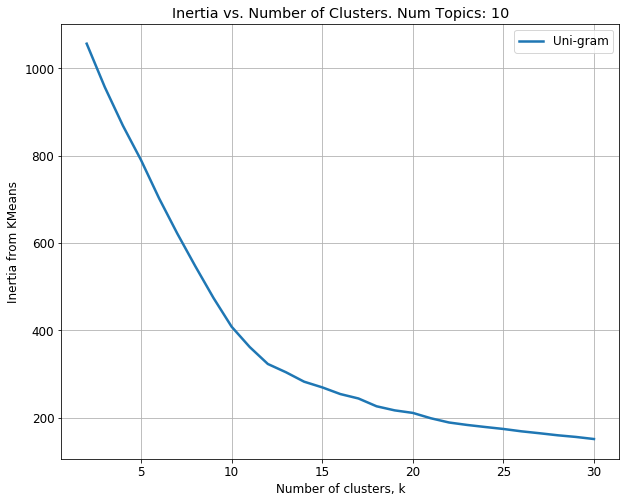

In [34]:
plt.rc('font', size=12)
plt.figure(figsize=(10,8));
plt.plot(cluster_range,inertia_vals1,linewidth=2.5,label='Uni-gram');
#plt.plot(cluster_range,inertia_vals2,linewidth=2.5,label='Bi-gram');
#plt.plot(cluster_range,inertia_vals3,linewidth=2.5,label='Tri-gram');
plt.xlabel('Number of clusters, k');
plt.ylabel('Inertia from KMeans');
plt.grid();
plt.title('Inertia vs. Number of Clusters. Num Topics: '+ str(10));
plt.legend(loc='best')
plt.savefig('kmeans_inertia_tfidf.svg')

In [35]:
# Uni-gram only for now
num_clusters = 12

km1f      = KMeans(n_clusters = num_clusters, n_jobs = -1, random_state=SEED)
km_fit1f  = km1f.fit(X_train_tfidf1_lsa1_topic)

#print(terms1)

clusters_1 = km1.labels_.tolist()

#print(clusters_1)

In [36]:
plt.rcParams['figure.figsize'] = [12,12]
sns.set_style("whitegrid")
sns.set_context("talk")

# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, km, num_clust):
    #color = 'brgcmyk'
    color = ['r','g','b','c','m','y','orange','w','aqua','yellow','r','g']
    alpha = 0.5
    s = 20
    
    plt.title('Clusters with centroids')
    
    if num_clust == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clust):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s,edgecolors='grey')
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 150)

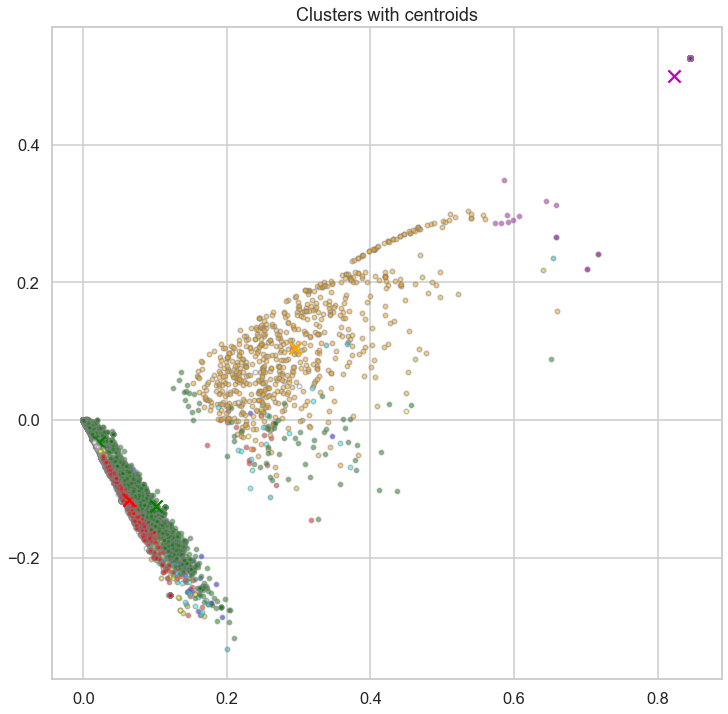

In [87]:
# Plot all clusters
display_cluster(X_train_tfidf1_lsa1_topic,km1f,12)

#### K-Means with LDA

In [ ]:
# Focus only on tf-idf
s_num_cluster = 2
e_num_cluster = 30

cluster_range = range(s_num_cluster,e_num_cluster+1)

inertia_vals_lda_uni = []
#inertia_vals2 = []
#inertia_vals3 = []

for i in cluster_range:
    km_lda_uni = KMeans(n_clusters = i, random_state = SEED, n_jobs = -1) # n_init, number of times the K-mean algorithm will run
    #km2 = KMeans(n_clusters = i, random_state = SEED, n_jobs = -1)
    #km3 = KMeans(n_clusters = i, random_state = SEED, n_jobs = -1)
    
    km_lda_uni_fit = km_lda_uni.fit(X_train_tfidf1_lda_topic20)
    #km_fit2 = km2.fit(X_train_tfidf2_lsa2_topic)
    #km_fit3 = km3.fit(X_train_tfidf3_lsa3_topic)
    
    inertia_vals_lda_uni.append(km_lda_uni_fit.inertia_)
    #inertia_vals2.append(km_fit2.inertia_)
    #inertia_vals3.append(km_fit3.inertia_)
    
#num_topics_ldabest = 5

In [ ]:
opt_n_topics = 20
plt.rc('font', size=12)
plt.figure(figsize=(10,8));
plt.plot(cluster_range,inertia_vals_lda_uni,linewidth=2.5,label='Uni-gram');
#plt.plot(cluster_range,inertia_vals2,linewidth=2.5,label='Bi-gram');
#plt.plot(cluster_range,inertia_vals3,linewidth=2.5,label='Tri-gram');
plt.xlabel('Number of clusters, k');
plt.ylabel('Inertia from KMeans');
#plt.grid();
plt.title('Inertia vs. Number of Clusters. Num Topics: '+ str(opt_n_topics));
plt.legend(loc='best')
plt.savefig('kmeans_inertia_tfidf_lda20_uni.svg')

In [39]:
km_lda_top20 = KMeans(n_clusters = 20, random_state = SEED, n_jobs = -1)

km_lda_top20_fit = km_lda_top20.fit(X_train_tfidf1_lda_topic20)

AttributeError: 'KMeans' object has no attribute 'labels_'

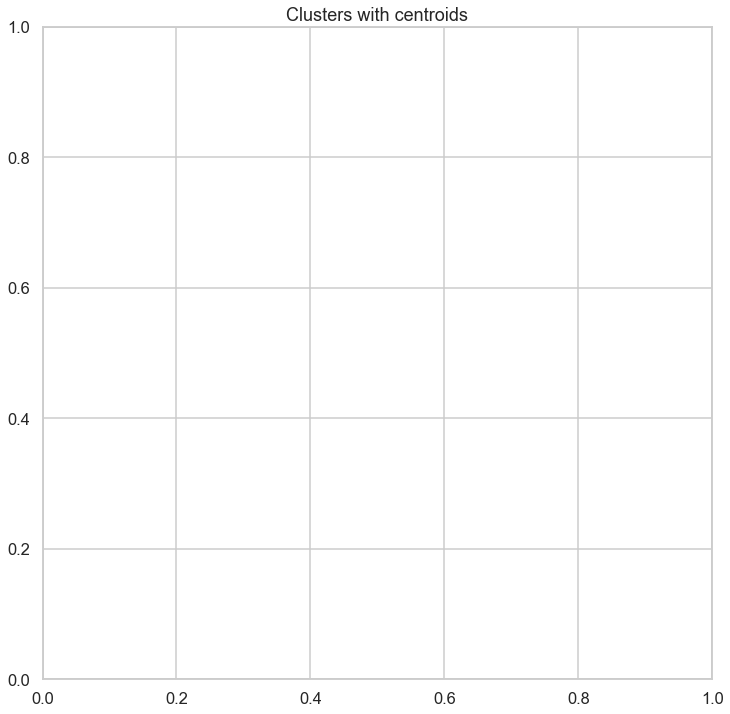

In [38]:
display_cluster(X_train_tfidf1_lda_topic20, km_lda_top20, 20)

plt.savefig('kmeans_cluster_tdidf20.svg')

In [40]:
lda_output = lda_top20.transform(X_train_tfidf1)

# Construct the k-means clusters
clusters = KMeans(n_clusters=20, random_state=SEED).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]
#z = lda_output_svd[:, 2]

# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))

# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))


Component's weights: 
 [[ 0.17  0.18  0.15  0.17  0.17  0.2   0.17  0.38  0.17  0.18  0.17  0.53
   0.2   0.2   0.22  0.17  0.18  0.18  0.14  0.17]
 [-0.06 -0.07 -0.06 -0.06 -0.06 -0.08 -0.06 -0.53 -0.06 -0.07 -0.06  0.8
  -0.08 -0.08 -0.11 -0.06 -0.07 -0.07 -0.05 -0.06]]
Perc of Variance Explained: 
 [0.02 0.11]


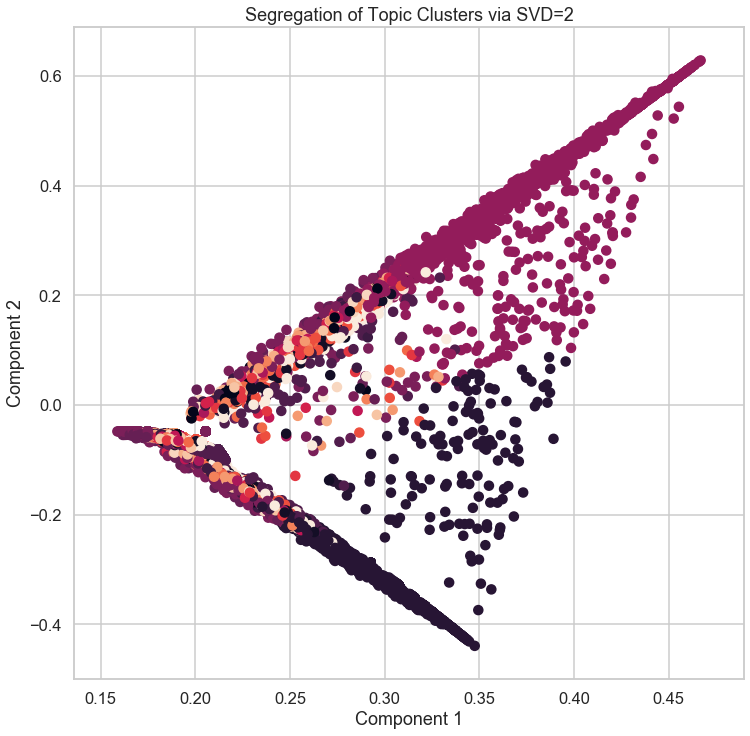

In [41]:
# Plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

plt.figure(figsize=(12, 12))

#fig = pyplot.figure()
#ax = Axes3D(fig)

#ax.scatter(x, y, z)
#pyplot.show()

plt.scatter(x, y, c=clusters)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title("Segregation of Topic Clusters via SVD=2" )
plt.savefig('kmeans_tfidf20_SVD2.svg')

## Predict a Topic & Cluster

Given that we already have a model per-se, let's feed the model to predict a topic. We will start with 5 topics for this one

In [ ]:
# A lot of the above is taken from Torin and 
# https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/

topic_probability_scores = lda_top10.transform(X_test_tfidf1[0])
topic = df_topic_keywords10.iloc[np.argmax(topic_probability_scores), :].values.tolist()
infer_topic = df_topic_keywords10.iloc[np.argmax(topic_probability_scores), -1]

print(X_test_tfidf1[0])
print(topic_probability_scores)
print(topic)
#print(infer_topic)

#def predict_topic(text,):
    
#    topic_probability_scores = skl_best_lda_model.transform(text)
#    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    
#    return topic, topic_probability_scores

In [ ]:
print(list(X_test)[1])

In [ ]:
print(X_test_tfidf1[1])

In [ ]:
# Predict using K-Means
num_clusters_final = 20

km_lda_20 = KMeans(n_clusters = num_clusters_final, random_state = SEED, n_jobs = -1)

km_lda_20_fit = km_lda_20.fit(X_train_tfidf1_lda_topic20)

km_lda_20_fit.labels_

km_lda_20_fit.cluster_centers_

print("Top terms per cluster:")
order_centroids = km_lda_20_fit.cluster_centers_.argsort()[:, ::-1]
terms = tfidf1.get_feature_names()
for i in range(20):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind], end='')
        print()

#text = X_test

X_test_tfidf1_lda_topic20 = lda_top20.transform(X_test_tfidf1)

prediction = km_lda_20_fit.predict(X_test_tfidf1_lda_topic20)

print(list(prediction))

list(X_test)

#print(X_test[1,:])

In [29]:
# Create Document - Topic Matrix

#X_test_tfidf1_lda_topic10 = lda_top10.transform(X_test_tfidf1)
#X_test_tfidf1_lda_topic10 = lda_top10.transform(X_test_tfidf1)

lda_output = lda_top20.transform(X_train_tfidf1)

# column names
topicnames = ["Topic" + str(i+1) for i in range(lda_top20.n_components)]

# index names
docnames = ["Doc" + str(i+1) for i in range(len(X_train))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics= df_document_topic #.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics_style = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
#df_document_topics

print(df_document_topic.shape)

df_document_topics_style

(22861, 21)


In [30]:
topic_keywords20 = show_topics(vectorizer=tfidf1, lda_model=lda_top20, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords20 = pd.DataFrame(topic_keywords20)
df_topic_keywords20.columns = ['Word '+str(i+1) for i in range(df_topic_keywords20.shape[1])]
df_topic_keywords20.index = ['Topic '+str(i) for i in range(df_topic_keywords20.shape[0])]
df_topic_keywords20

Word 1      Word 2    Word 3    Word 4      Word 5     Word 6  \
Topic 0     follow       agree      come   amazing       wrong  concourse   
Topic 1       porn       right     child    number       movie      stuff   
Topic 2       hope       shame      wifi      damn       breed     choose   
Topic 3       love       sorry      like      hear       catch   aviation   
Topic 4       good        suck      cool     thing        okay      think   
Topic 5      thank        seat      girl    middle   attendant    comfort   
Topic 6       safe        game      shit     flown   beautiful      sound   
Topic 7     ticket        help      mile      card      status     trying   
Topic 8     better     looking      hate   forward       hello      check   
Topic 9       left     exactly     worst  possible        lost     report   
Topic 10   atlanta        soon  terminal  favorite      reason      carry   
Topic 11      hour        gate     delay    minute  connection     boston   
Topic 12      work     private    happen  response        luck   happened   
Topic 13     scene       movie      film     cabin      lounge  rocketman   
Topic 14  customer     service      true     enjoy     problem       nice   
Topic 15      wish       money     ready      hank        club      avoid   
Topic 16      seat        hell    window   airport        plan      class   
Topic 17      baby        pump      read   pumping       happy   bathroom   
Topic 18  airplane  definitely     place   message       tweet      heard   
Topic 19   awesome       sleep     great      help       watch       fuck   

              Word 7    Word 8      Word 9  Word 10  
Topic 0         open   airport   literally    awful  
Topic 1        watch  watching     showing   update  
Topic 2       wouldn   service      future     head  
Topic 3        great     proud     heading   apollo  
Topic 4         word      play     economy   choice  
Topic 5      upgrade      trip      making     dude  
Topic 6   assistance    direct      travel     like  
Topic 7         book  question     account   change  
Topic 8       seeing   upgrade        haha  perfect  
Topic 9         mean    friday    shoutout  service  
Topic 10    probably     crazy       check     blue  
Topic 11     waiting   sitting        late    leave  
Topic 12     happens     email        good  service  
Topic 13        main   content   booksmart   access  
Topic 14       world      glad   excellent  counter  
Topic 15        mind    friend        gift  retweet  
Topic 16       video    couldn  wheelchair     cost  
Topic 17      breast      milk  disgusting    sense  
Topic 18   hopefully      free     brother     dear  
Topic 19       movie    spirit     welcome     long

In [31]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

Topic Num  Num Documents
0          11           2538
1           7           2117
2           0           1726
3          14           1284
4           5           1200
5          13           1110
6          12           1106
7          17           1031
8          16           1026
9           1           1000
10          9            969
11          4            954
12          6            927
13         19            927
14          3            921
15         15            905
16         10            888
17          8            888
18          2            735
19         18            609

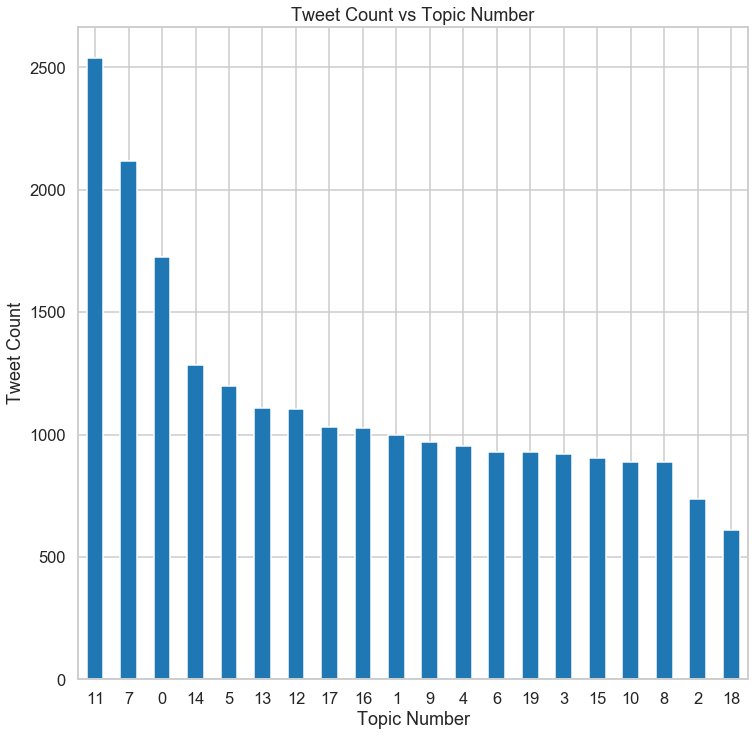

In [111]:
ax = df_topic_distribution.plot.bar(x='Topic Num', y='Num Documents', rot=0)

#print(df_topic_distribution.columns)


#for bar in ax.patches:
#    bar.set_facecolor('#888888')
    
#highlight = '11'
#pos = df_topic_distribution.index.loc(highlight)
    
#ax.patches[pos].set_facecolor('#aa3333')
ax.set_xlabel('Topic Number')
ax.set_ylabel('Tweet Count')
ax.get_legend().remove()
ax.set_title('Tweet Count vs Topic Number');
plt.savefig('tweet_count_topic_number20.svg')

In [43]:
df_topic_distribution.sort_values(by=['Topic Num'])

Topic Num  Num Documents
2           0           1726
9           1           1000
18          2            735
14          3            921
11          4            954
4           5           1200
12          6            927
1           7           2117
17          8            888
10          9            969
16         10            888
0          11           2538
6          12           1106
5          13           1110
3          14           1284
15         15            905
8          16           1026
7          17           1031
19         18            609
13         19            927

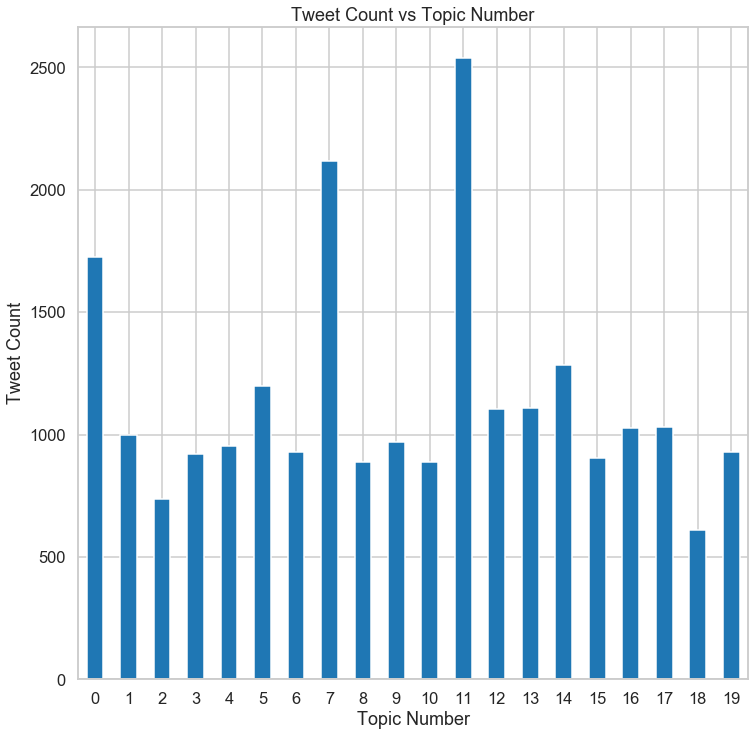

In [44]:
ax = df_topic_distribution.sort_values(by=['Topic Num']).plot.bar(x='Topic Num', y='Num Documents', rot=0)
ax.set_xlabel('Topic Number')
ax.set_ylabel('Tweet Count')
ax.get_legend().remove()
ax.set_title('Tweet Count vs Topic Number');

In [45]:
dom_topic = df_document_topics['dominant_topic']

In [46]:
# Sentiment analysis
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

sentence = list(X_train)[110]

print(sentence)

score = sid.polarity_scores(sentence)

print(score)

    
#list(list(s.items())[-1])[1]

lb = score['compound']
print(lb)


thought security violation board convenience thing atlanta augusta
{'neg': 0.276, 'neu': 0.517, 'pos': 0.207, 'compound': -0.2023}
-0.2023


In [47]:
def sentiment_analyzer_scores(text):
    
    score = sid.polarity_scores(text)
    
    lb = score['compound']
    
    return(lb)
    
    #if lb >= 0.5:
    #    return 'Very Negative'
    #elif lb >= 0.05 and lb < 0.5:
    #    return 'Negative'
    #elif (lb > -0.05) and (lb < 0.05):
    #    return 'Neutral'
    #elif lb <= -0.05 and lb > -0.5:
    #    return 'Positive'
    #else:
    #    return 'Very Positive'
    
sentence = list(X_train)[101]

print(sentence)
    
sentiment_analyzer_scores(sentence)

sentiment = []

myDict = {}

for text in list(X_train):
    sentiment.append(sentiment_analyzer_scores(text))
    
#dft = pd.DataFrame(list(zip(list(X_train), sentiment)), 
#                   columns =['Text', 'Sentiment'])

#dft.head()


twice today domestically atlanta friendly helpful crew passenger understand ethic recline seat asking bum tall travel


In [48]:
from collections import Counter

#Counter(dft['Sentiment'])

In [49]:
# Get date time into a more readable format
from datetime import datetime

date_n_time = list(df_ct1.date)

#print(df_ct1)

DATETIME = []

i = -1

for date in df_ct1.date:
    i = i + 1
    
    mm = int(date.split()[0].split('/')[0])
    dd = int(date.split()[0].split('/')[1])
    yy = int('20'+date.split()[0].split('/')[2])

    hh = int(date.split()[1].split(':')[0])
    mi = int(date.split()[1].split(':')[1])
    
    temp1 = datetime(yy,mm,dd,hh,mi)
    
    DATETIME.append(temp1)

print(len(DATETIME))



22861


In [50]:
#plt.figure(figsize=(16,6));
#plt.plot(np.asarray(TIME),yy)
#plt.grid()
#plt.show()

#print(type(yy))

dff = pd.DataFrame(list(zip(DATETIME,list(X_train), dom_topic, sentiment)), 
                    columns =['DateTime','Clean Text', 'Dominant Topic','Sentiment'])

dff.head()


DateTime                                         Clean Text  \
0 2019-11-13 23:59:00  ouch rough travel day past day burned frustrating   
1 2019-11-13 23:59:00  forgot ask receipt paying baggage tomorrow pos...   
2 2019-11-13 23:59:00      wha amazing amazing marina access lounge week   
3 2019-11-13 23:59:00                                       god hahahaha   
4 2019-11-13 23:59:00  flew seattle watched nlcs game crazy come grea...   

   Dominant Topic  Sentiment  
0              17    -0.4404  
1               6     0.0000  
2              13     0.8225  
3               0     0.2732  
4              10     0.4019

#### Plot-ly

In [52]:
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

import pandas as pd

fig = go.Figure()
# Create figure with secondary y-axis
#fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
                x=dff['DateTime'],
                y=dff['Dominant Topic'],
                name="Dominant Topic",
                line_color='deepskyblue',
                line=dict(width=1.5),
                opacity=0.8))  #,secondary_y=False

#fig = go.Figure(data=[go.Bar(x=dff['DateTime'], y=dff['Dominant Topic'])])
#fig = px.bar(data_canada, x=dff['DateTime'], y=dff['Dominant Topic'])
#fig.show()

#fig.add_trace(go.Scatter(
#                x=dff['DateTime'],
#                y=dff['Sentiment'],
#                name="Sentiment",
#                line_color='deepskyblue',
#                opacity=0.8),secondary_y=True)



# Use date string to set xaxis range
#fig.update_layout(xaxis_range=['2016-07-01','2016-12-31'],
#                  title_text="Manually Set Date Range")

fig.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_title="Date & Time",
                  xaxis_rangeslider_visible=True)

# Set y-axes titles
#fig.update_yaxes(title_text="<b>Dominant Topic</b>")
#fig.update_yaxes(title_text="<b>Dominant Topic</b>", secondary_y=False)
#fig.update_yaxes(title_text="<b>Rough Sentiment</b>", secondary_y=True)

fig.show()



#x = np.array([datetime(2013, 9, 28, i, 0) for i in range(24)])
#y = np.random.randint(100, size=x.shape)

#plt.figure(figsize=(16,6));
#plt.plot(x,y)
#plt.grid()
#plt.show()